### Import libraries

In [68]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lxml import objectify
%matplotlib inline

data_folder = './GitHub/ada-2022-project-badassteam/Data/'

### Load data

In [69]:
#Movie metadata
df_movie = pd.read_table(data_folder +'movie.metadata.tsv',header=None)
df_movie.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID', 'Movie_name' , 'Movie_date' , 'Movie_revenue' , 'Movie_runtime' , 'Movie_languages' , 'Movie_countries' , 'Movie_genres']
df_movie

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


### Import pytrends

In [103]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', retries=2)

Defaulting to user installation because normal site-packages is not writeable


In [104]:
#get today's treniding topics
trendingtoday = pytrend.today_searches(pn='US')
trendingtoday.head(20)

C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(trend['title'], ignore_index=True)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(trend['title'], ignore_index=True)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(trend['title'], ignore_index=True)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:447: FutureWarning: The frame.append method is deprecated 

0     /trends/explore?q=U.S.+Senate+Pennsylvania+gen...
1     /trends/explore?q=Election+Results+2022&date=n...
2     /trends/explore?q=Georgia+election+results&dat...
3     /trends/explore?q=Herschel+Walker&date=now+7-d...
4       /trends/explore?q=Kari+Lake&date=now+7-d&geo=US
5             /trends/explore?q=CNN&date=now+7-d&geo=US
6     /trends/explore?q=Beto+O'Rourke&date=now+7-d&g...
7     /trends/explore?q=Michigan+election+results+20...
8     /trends/explore?q=California+Election+Results+...
9     /trends/explore?q=Ron+DeSantis&date=now+7-d&ge...
10    /trends/explore?q=Illinois+election+results&da...
11    /trends/explore?q=Florida+elections+2022&date=...
12       /trends/explore?q=Tim+Ryan&date=now+7-d&geo=US
13    /trends/explore?q=Lauren+Boebert&date=now+7-d&...
14    /trends/explore?q=Josh+Shapiro&date=now+7-d&ge...
15            /trends/explore?q=FTX&date=now+7-d&geo=US
16    /trends/explore?q=Republican+Party&date=now+7-...
17    /trends/explore?q=Oregon+governor+race&dat

In [105]:
#provide your search terms
kw_list=['dicaprio', 'eastwood', 'depp', 'portman', 'johansson']


#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list)

# Interest by Region
regiondf = pytrend.interest_by_region()

#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).any(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.head(10)

,dicaprio,eastwood,depp,portman,johansson
geoName,,,,,
Argentina,23,11,34,11,21
Australia,14,38,31,8,9
Austria,19,10,49,7,15
Belgium,22,13,42,10,13
Brazil,24,9,38,10,19
Canada,16,16,46,8,14
Chile,21,8,37,11,23
Colombia,21,7,41,9,22
Costa Rica,17,11,42,9,21


<AxesSubplot:xlabel='Country'>

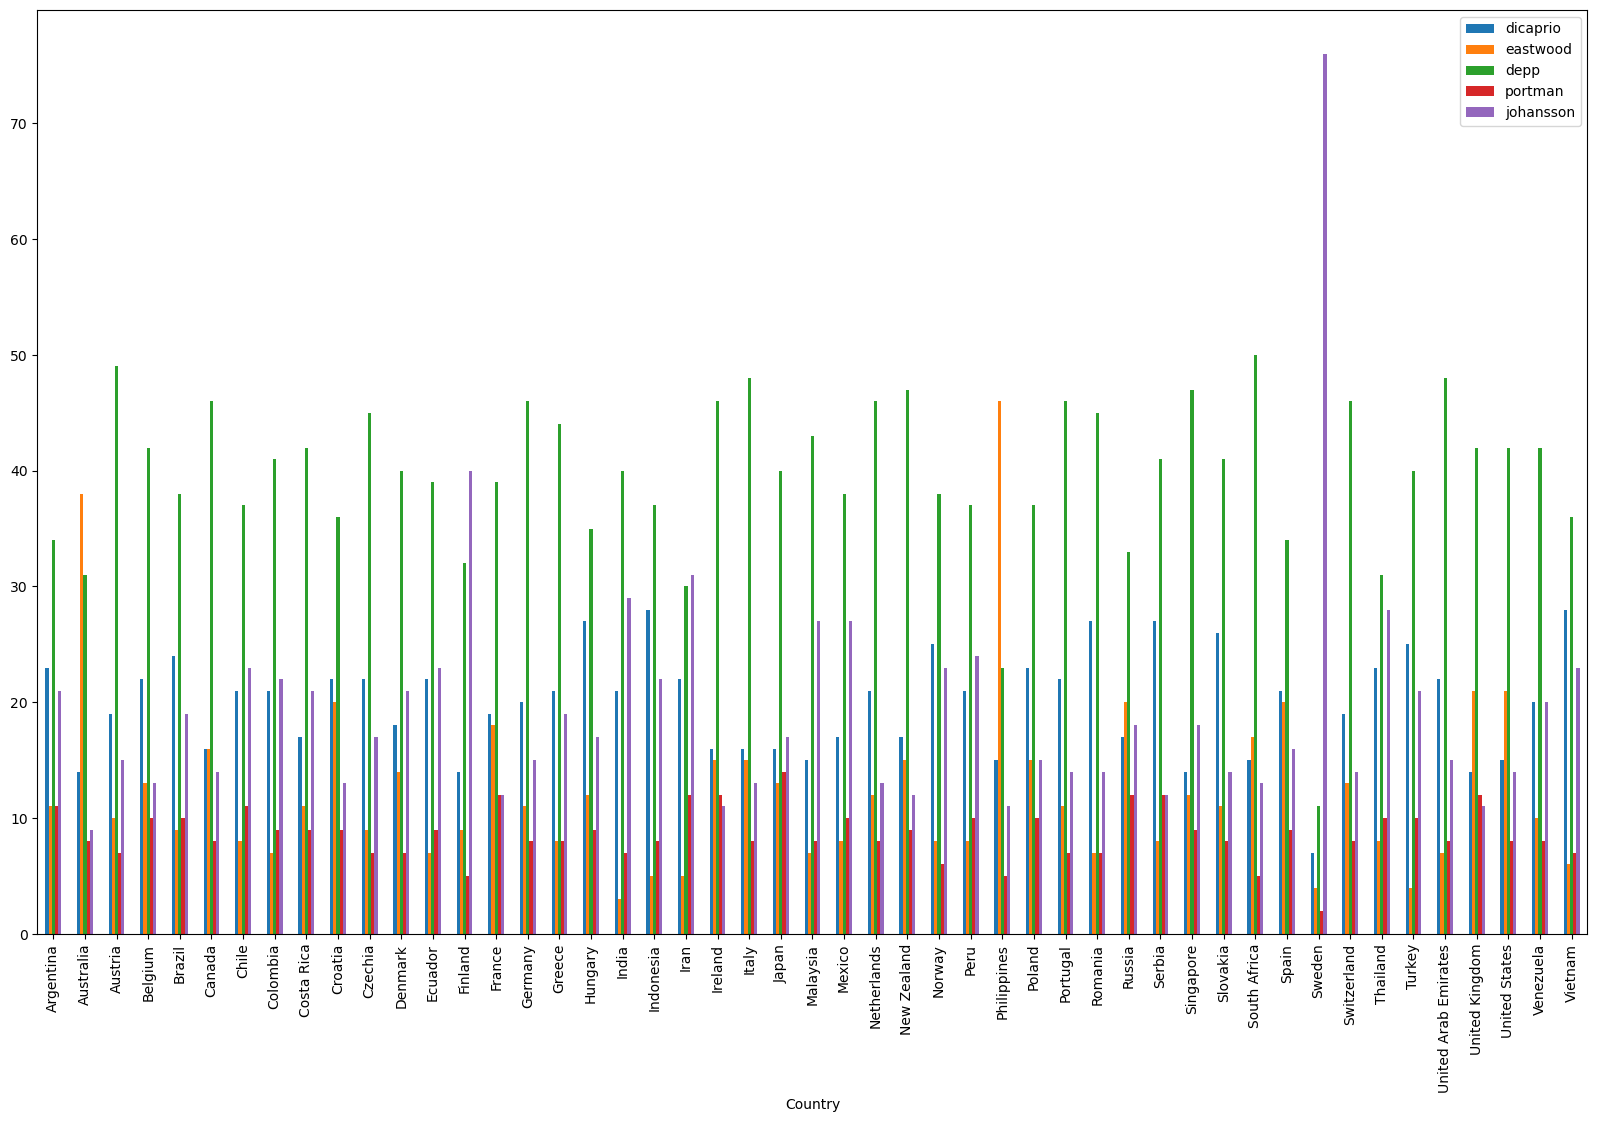

In [106]:
#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar', xlabel='Country')

In [107]:
pytrend.build_payload(kw_list=kw_list)
#get related queries
related_queries = pytrend.related_queries()
related_queries.values()


#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

#check your dataset
allqueries.head(50)

#save to csv
allqueries.to_csv('allqueries.csv')

allqueries

,top query,top query value,related query,related query value
0,leonardo,100,camila morrone leonardo dicaprio,143700
1,leonardo dicaprio,92,camila morrone,112650
2,dicaprio movies,7,leonardo dicaprio 2021,42850
3,leonardo dicaprio movies,7,once upon a time in hollywood,42700
4,leo,6,leonardo dicaprio 2022,23950
5,leo dicaprio,6,leonardo dicaprio and camila morrone,17850
6,leonardo dicaprio movie,5,leonardo dicaprio 2019,16950
7,brad pitt,5,timothee chalamet,12600
8,titanic,5,leonardo dicaprio 2020,11900
9,titanic leonardo dicaprio,4,dont look up,8200


C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

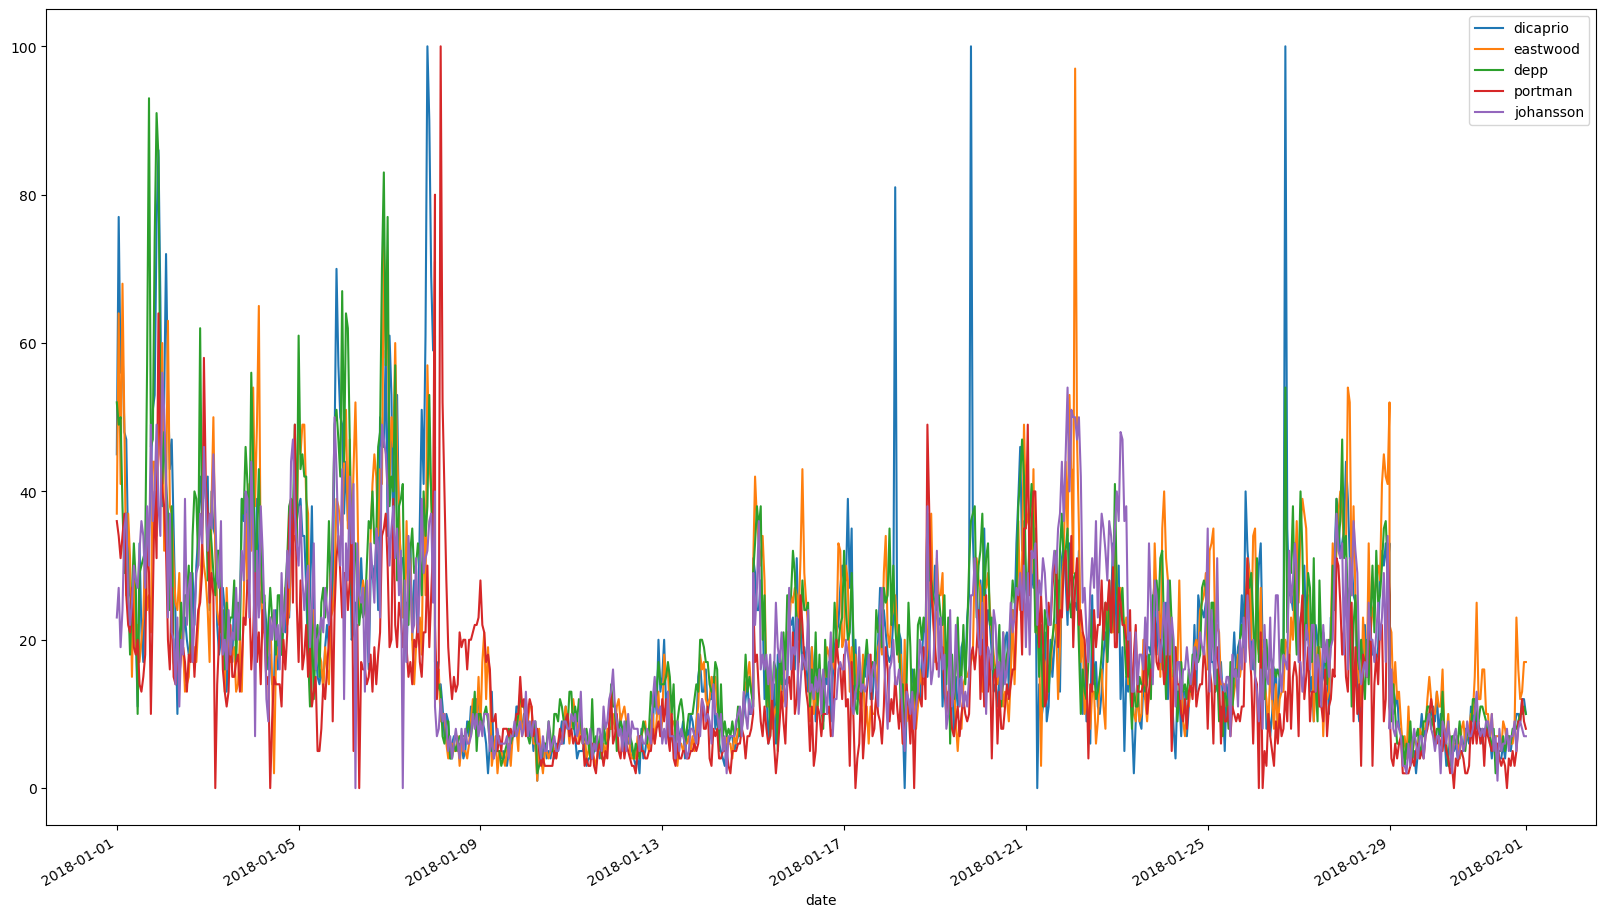

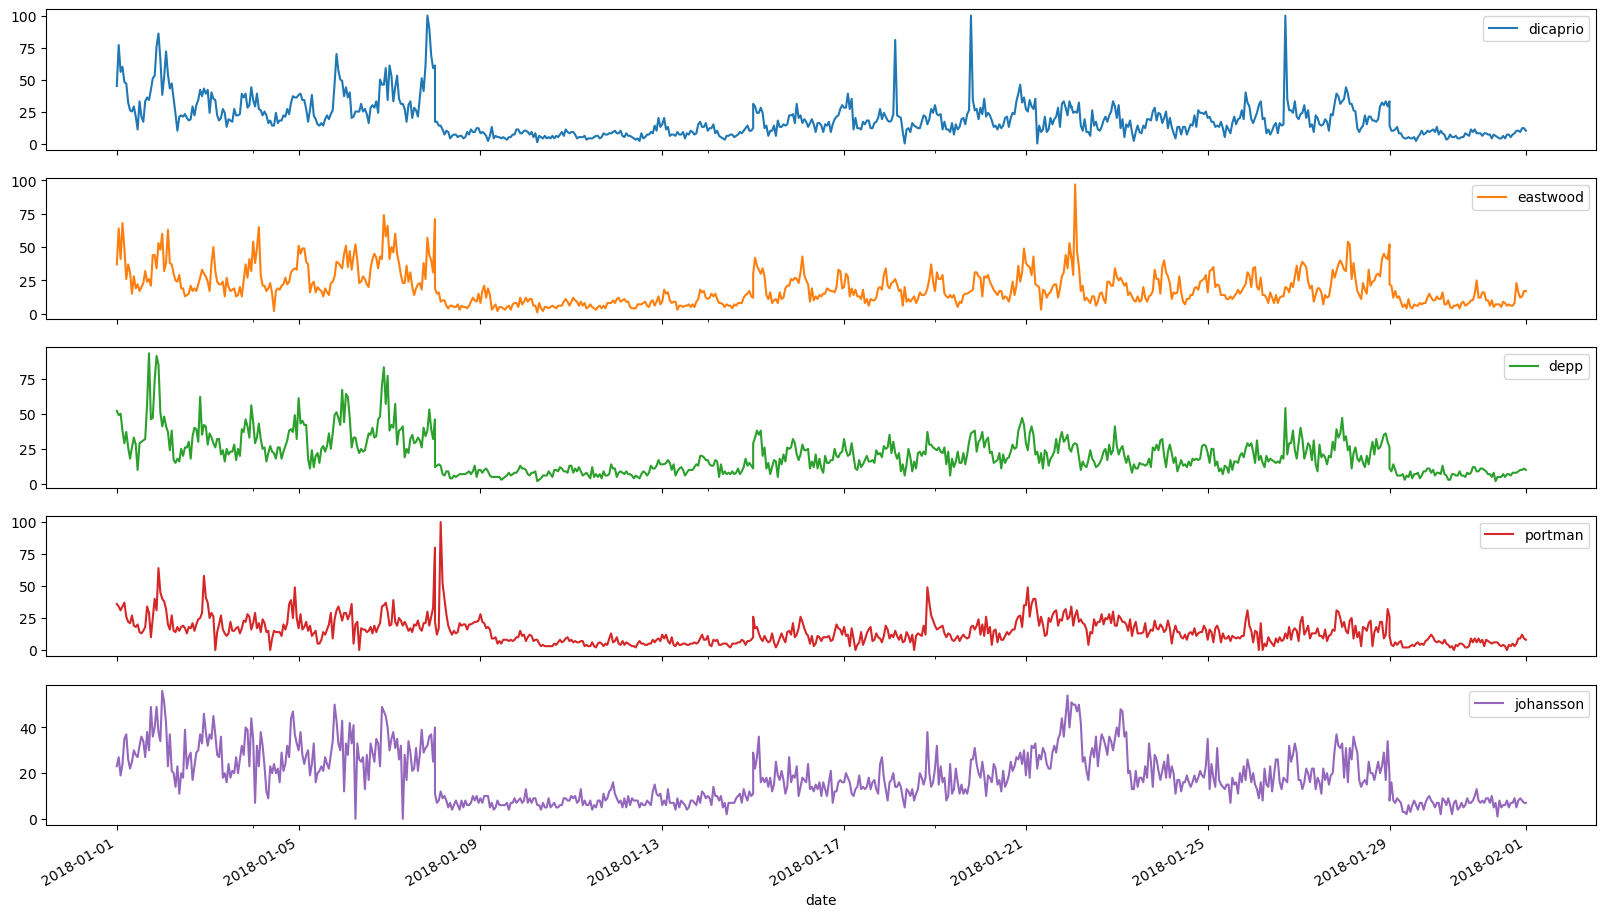

In [108]:
#historical interest
historicaldf = pytrend.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

#visualise
#plot a timeseries chart
historicaldf.plot(figsize=(20, 12))

#plot seperate graphs, using theprovided keywords
historicaldf.plot(subplots=True, figsize=(20, 12))

C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\SP80_record\AppData\Roaming\Python\Python39\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

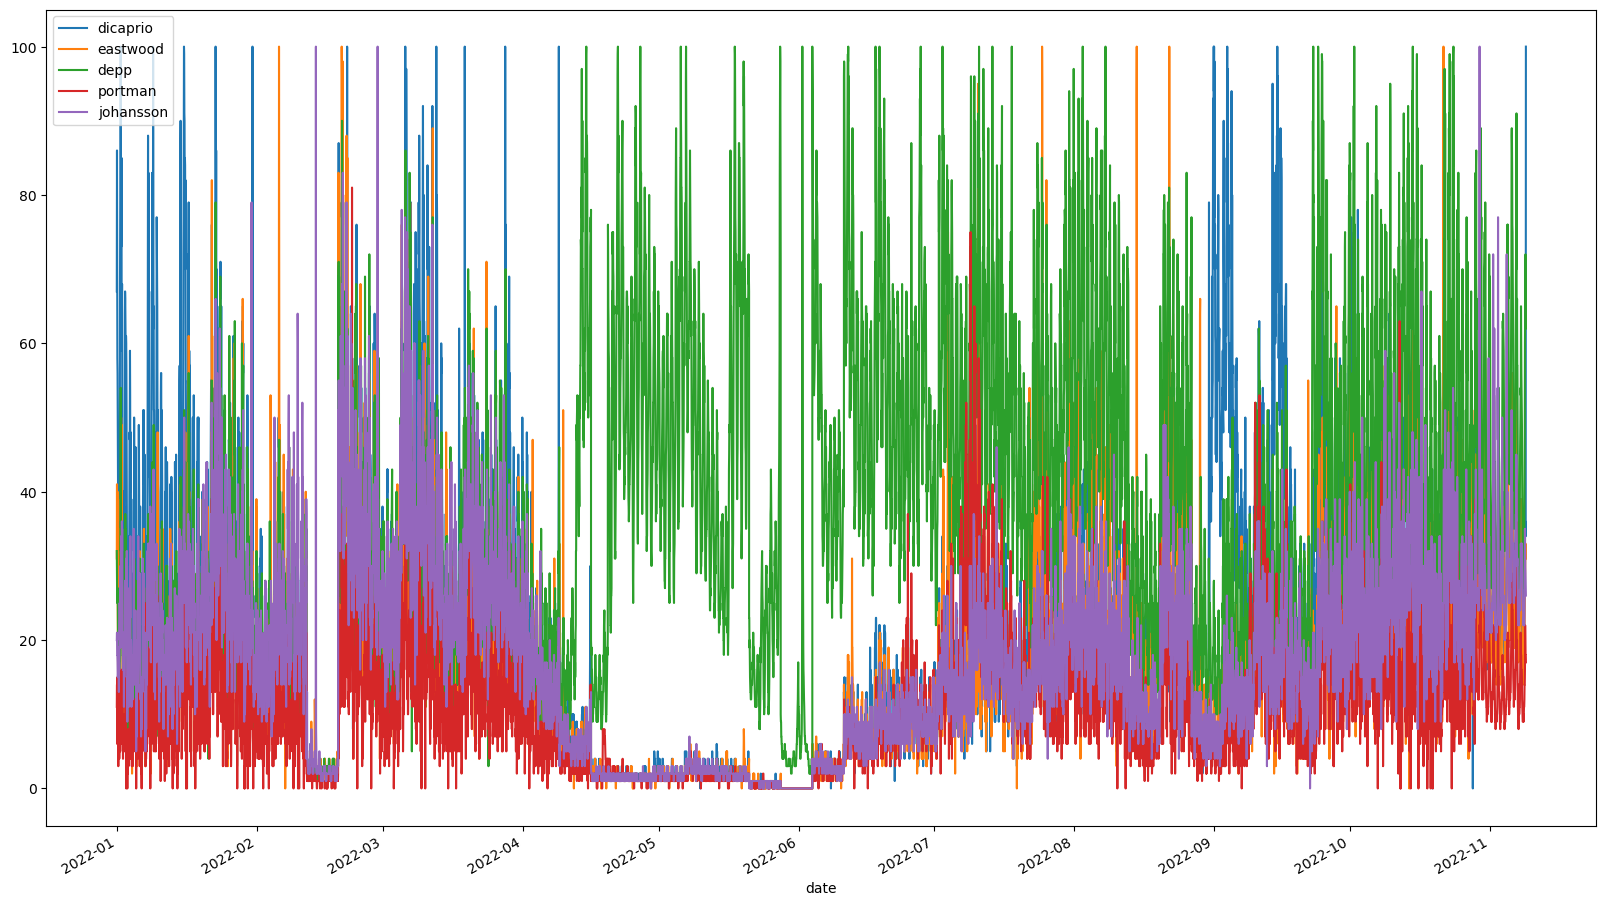

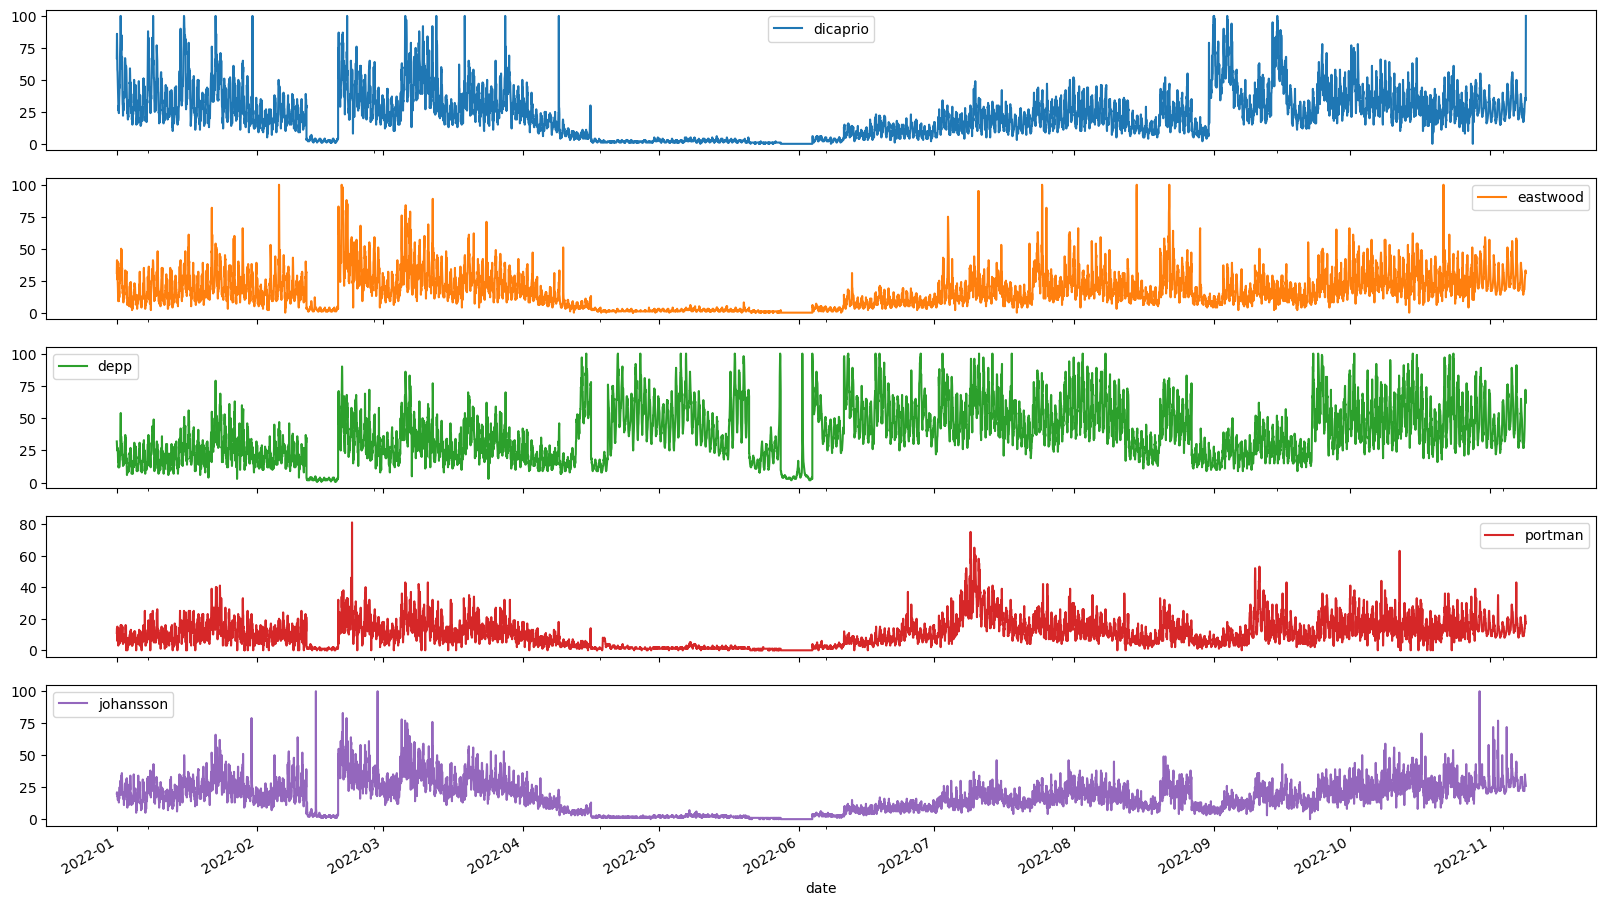

In [112]:
#historical interest
historicaldf = pytrend.get_historical_interest(kw_list, year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=11, day_end=9, hour_end=0, cat=0, geo='', gprop='', sleep=0)

#visualise
#plot a timeseries chart
historicaldf.plot(figsize=(20, 12))

#plot seperate graphs, using theprovided keywords
historicaldf.plot(subplots=True, figsize=(20, 12))

In [113]:
historicaldf.head()

,dicaprio,eastwood,depp,portman,johansson,isPartial
date,,,,,,
2022-01-01 00:00:00,67,31,32,11,20,False
2022-01-01 01:00:00,86,41,29,14,21,False
2022-01-01 02:00:00,70,26,25,6,18,False
2022-01-01 03:00:00,58,31,26,15,18,False
2022-01-01 04:00:00,56,40,26,8,17,False


In [117]:
historicaldf_mean = historicaldf.groupby(np.arange(len(historicaldf))//24).mean()

historicaldf_mean

,dicaprio,eastwood,depp,portman,johansson,isPartial
0,56.541667,25.250000,24.625000,8.583333,20.000000,0.0
1,48.333333,21.916667,22.916667,9.583333,21.625000,0.0
2,37.375000,15.458333,15.125000,6.500000,19.875000,0.0
3,31.125000,12.291667,16.000000,7.458333,18.375000,0.0
4,30.000000,11.458333,17.083333,7.250000,17.458333,0.0
...,...,...,...,...,...,...
309,30.875000,30.000000,52.458333,13.958333,29.416667,0.0
310,35.750000,32.791667,60.416667,17.750000,31.625000,0.0
311,34.333333,31.166667,53.625000,17.541667,31.166667,0.0
312,27.375000,25.375000,42.833333,13.625000,27.166667,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

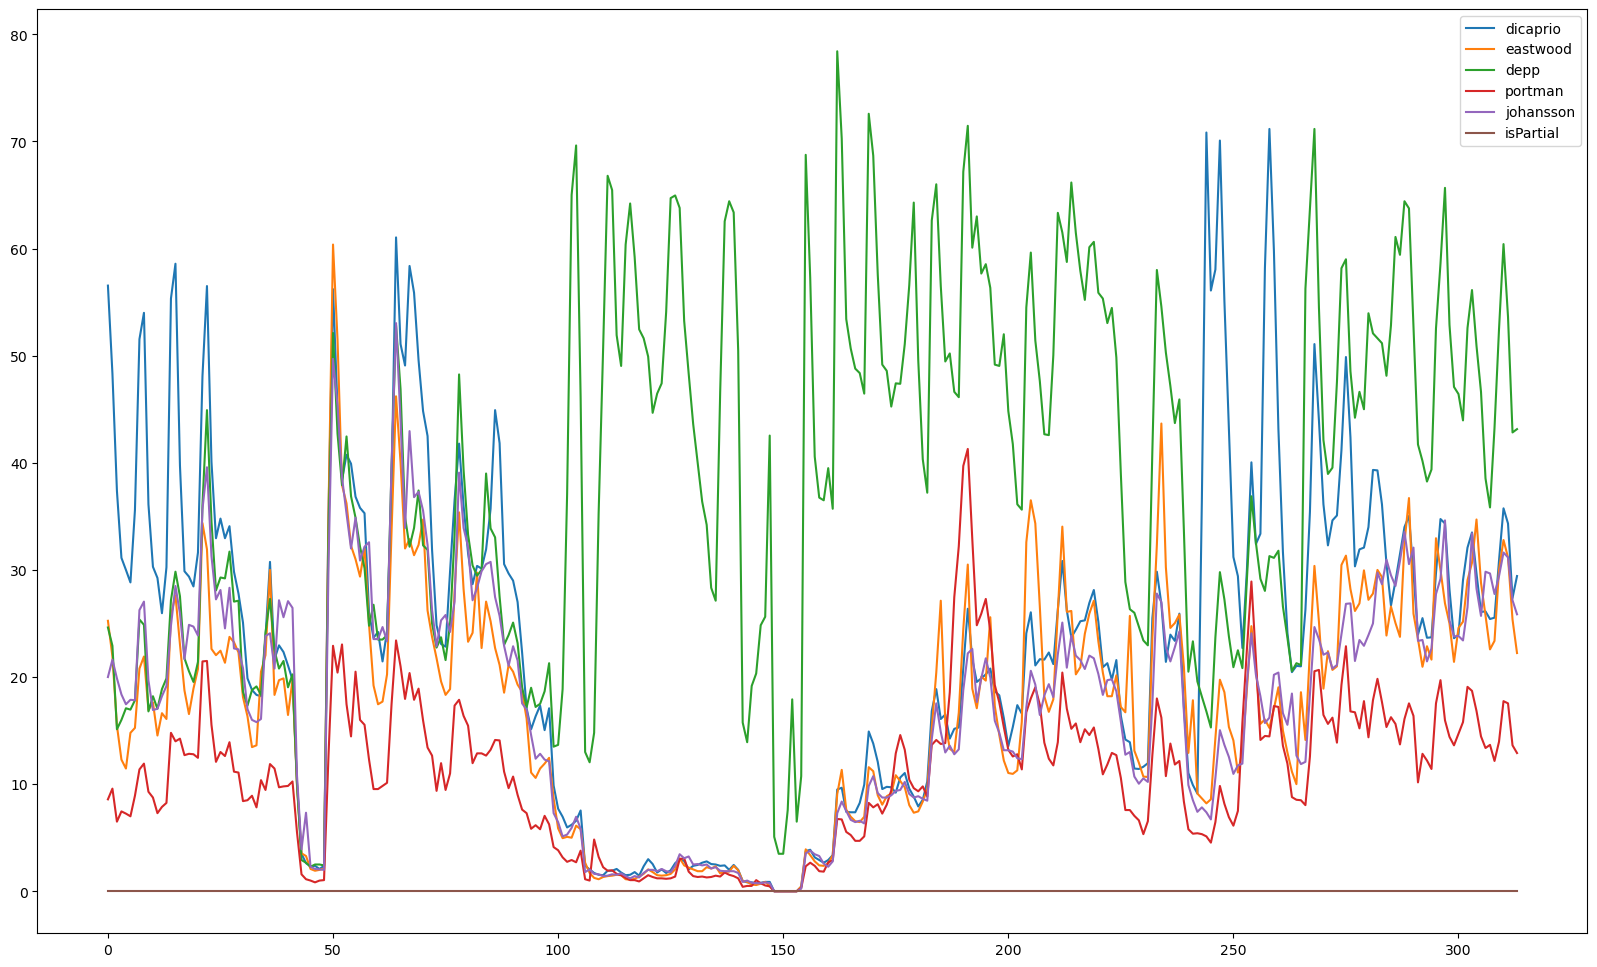

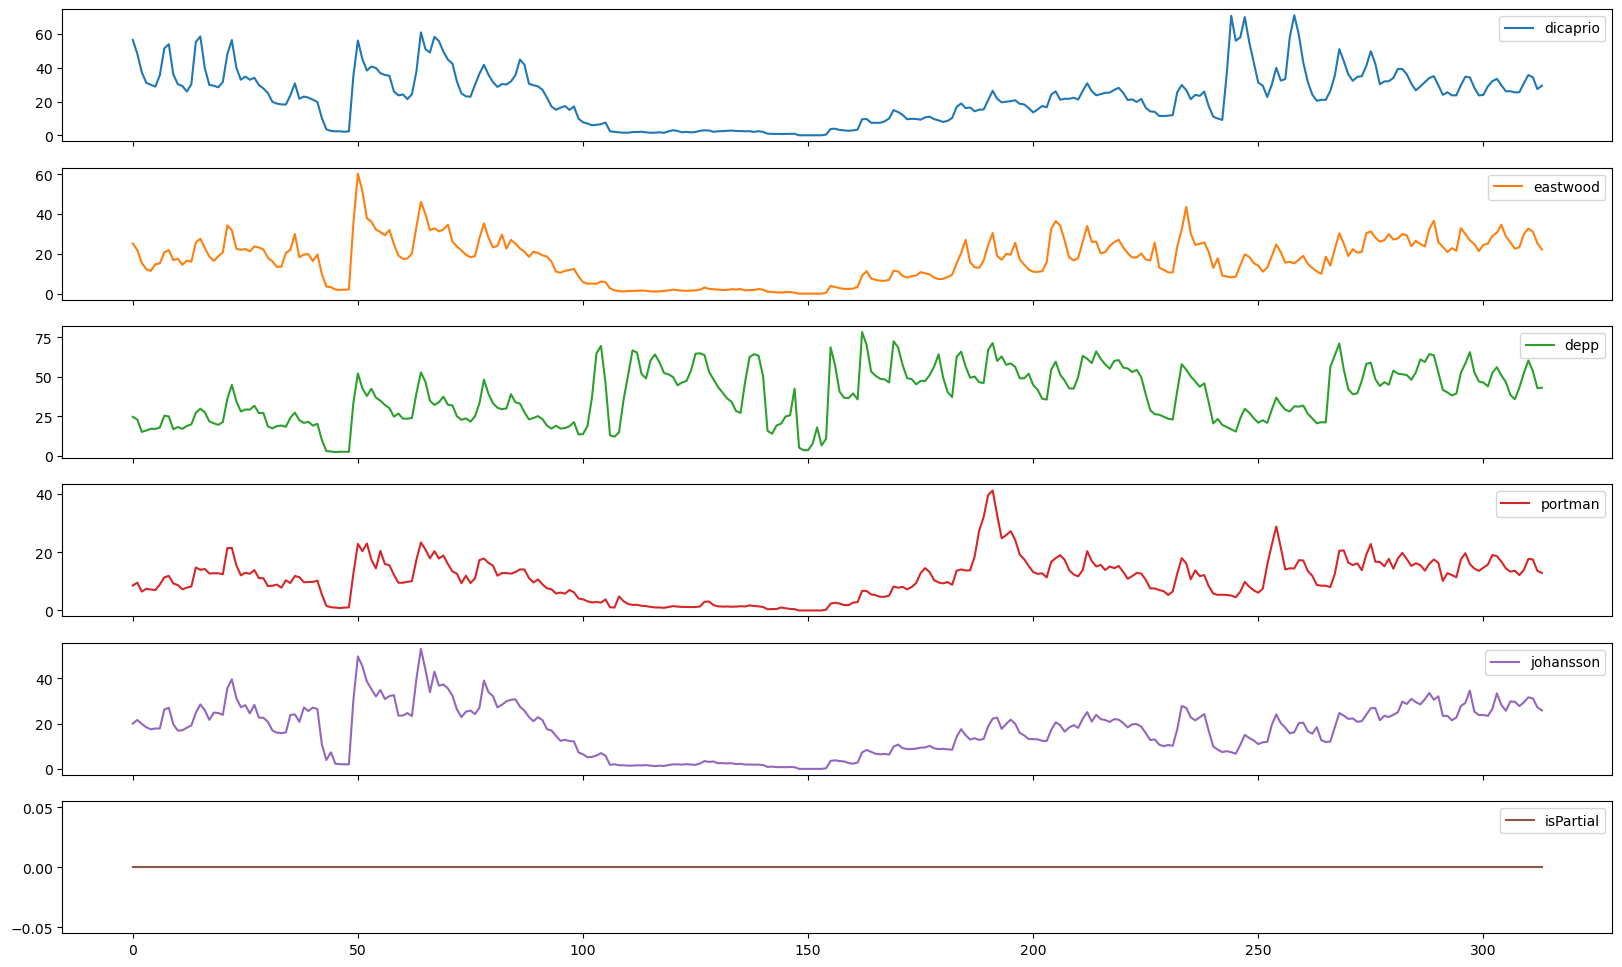

In [118]:
#visualise
#plot a timeseries chart
historicaldf_mean.plot(figsize=(20, 12))

#plot seperate graphs, using theprovided keywords
historicaldf_mean.plot(subplots=True, figsize=(20, 12))